In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from make_dataset import renamed_columns_en, process_raw, clean_na, make_dataset, abbreviation
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#bring in the six packs
df_train = pd.read_csv('D:\CS661\Project\data\southeast.csv')

In [4]:
abs = abbreviation
print(abs)

['date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [5]:
#changing column names
if len(abs)<27:
    abs.insert(0, "index")
df_train.columns = abs
print(abs)

['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [6]:
num_rows = len(df_train['tmax'])

In [7]:
df_train.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

In [8]:
df_train.replace(-9999, np.nan, inplace=True)

In [9]:
new_df = pd.DataFrame({col: [] for col in abbreviation})
new_df.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

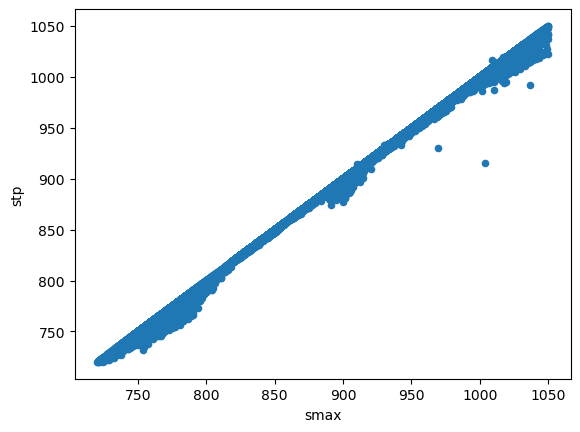

In [10]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([df_train['stp'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='stp');

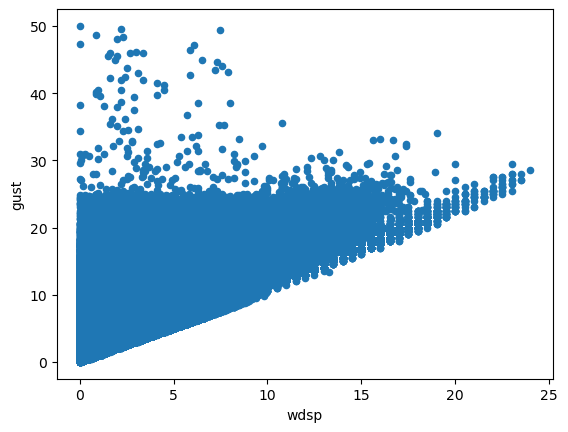

In [11]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([df_train['gust'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [12]:
gust_out_liers = []
for i in range(num_rows):
    y = df_train['gust'][i]
    x = df_train['wdsp'][i]
    if y > 28:
        gust_out_liers.append(i)

new_df = df_train.drop(gust_out_liers)
new_df = new_df.reset_index(drop=True)


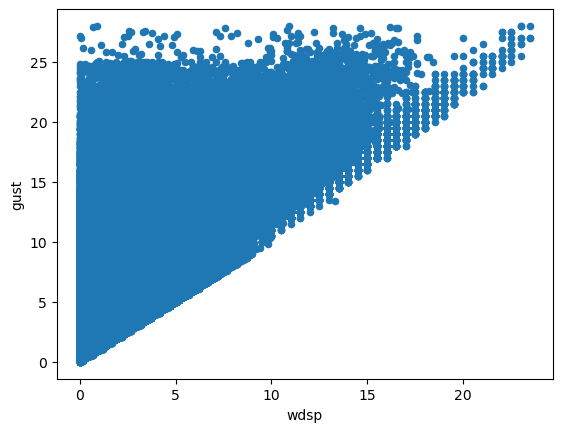

In [13]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([new_df['gust'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [14]:
stp_smax_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    x = new_df['smax'][i]
    y = new_df['stp'][i]
    if y < x - 60:
        stp_smax_out_liers.append(i)

new_df = new_df.drop(stp_smax_out_liers)
new_df = new_df.reset_index(drop=True)

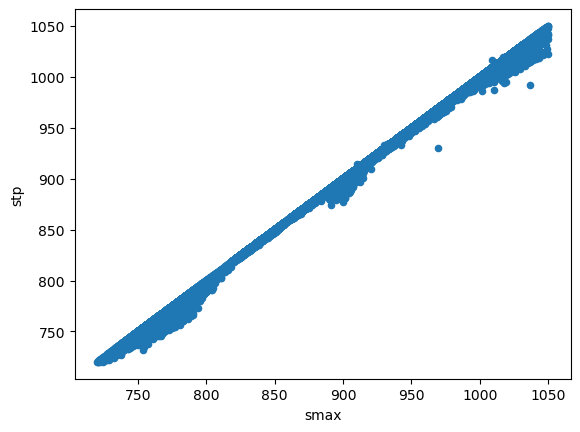

In [15]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([new_df['stp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='stp');

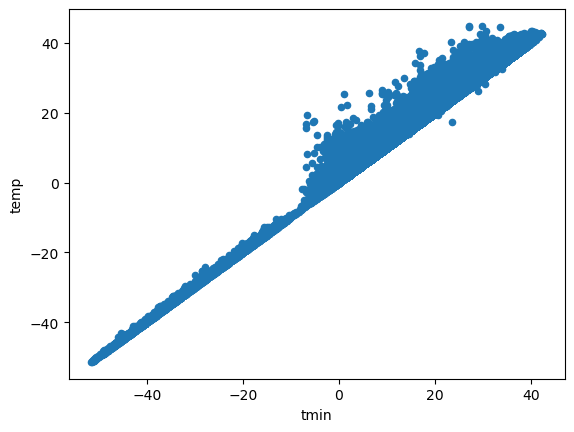

In [16]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

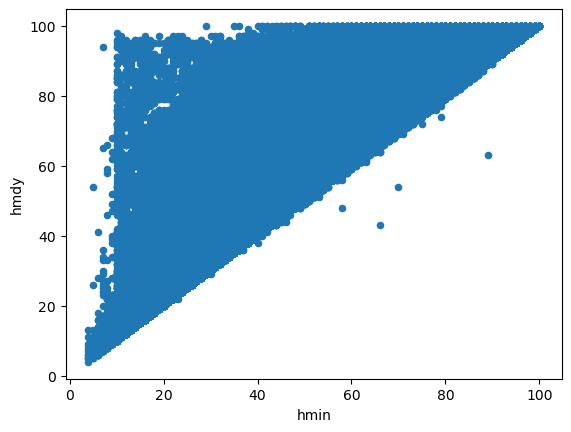

In [17]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [18]:
hmdy_hmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['hmdy'][i]
    x = new_df['hmin'][i]
    if y < x - 3:
        hmdy_hmin_out_liers.append(i)

new_df = new_df.drop(hmdy_hmin_out_liers)
new_df = new_df.reset_index(drop=True)

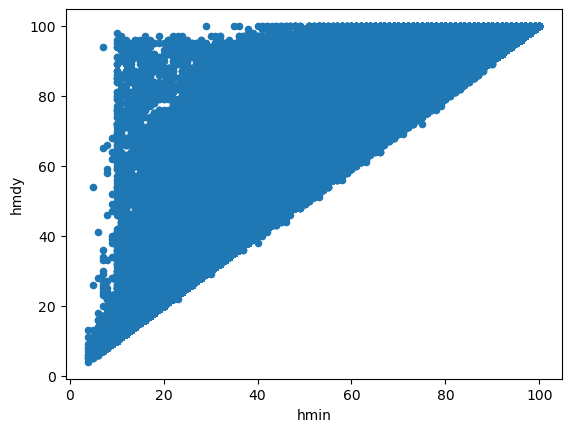

In [19]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [20]:
missing_percentages = new_df.isna().mean() * 100
print(missing_percentages)

index     0.000000
date      0.000000
hour      0.000000
prcp      8.631394
stp       7.262687
smax      7.315356
smin      7.314939
gbrd     46.159247
temp      6.720474
dewp      7.928732
tmax      6.767381
tmin      6.766990
dmax      7.983251
dmin      8.061374
hmax      7.755399
hmin      7.830616
hmdy      7.750766
wdct      9.321232
gust      9.159538
wdsp      9.043481
regi      0.000000
prov      0.000000
wsnm      0.000000
inme      0.000000
lat       0.000000
lon       0.000000
elvt      0.119022
dtype: float64


In [21]:
df_mean =  new_df.drop(['index', 'hour', 'gbrd', 'smax', 'smin', 'tmin', 'tmax', 'dmax', 'dmin', 'hmax', 'hmin', 'dewp', 'gust'], axis=1)
#df_mean =  df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt'])[['prcp', 'temp', 'hmdy', 'wdct', 'wdsp', 'stp']].mean()
df_mean = df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt']).agg({'prcp': 'mean', 'stp': 'mean', 'temp': 'mean', 'hmdy': 'mean', 'wdct': 'mean', 'wdsp': 'mean'}).reset_index()

In [22]:
missing_percentages = df_mean.isna().mean() * 100
print(missing_percentages)

date    0.000000
inme    0.000000
regi    0.000000
prov    0.000000
wsnm    0.000000
lat     0.000000
lon     0.000000
elvt    0.000000
prcp    6.618929
stp     4.906807
temp    4.361102
hmdy    4.794848
wdct    6.949483
wdsp    6.664809
dtype: float64


In [23]:
df_sorted = df_mean.sort_values(by=['inme', 'date'])

In [24]:
df_interpolated = df_sorted.interpolate()
missing_percentages = df_interpolated.isna().mean() * 100
print(missing_percentages)

date    0.000000
inme    0.000000
regi    0.000000
prov    0.000000
wsnm    0.000000
lat     0.000000
lon     0.000000
elvt    0.000000
prcp    0.016598
stp     0.016598
temp    0.016598
hmdy    0.016598
wdct    0.035858
wdsp    0.035858
dtype: float64


In [25]:
df_interpolated.to_csv('D:\CS661\Project\data\southeast_new.csv', index=False)

In [26]:
print("hi")

hi
